In [114]:
#Deliverable 2: Scrape and Analyze Mars Weather Data
# Import Splinter and BeautifulSoup
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager

In [115]:
# import pandas
import pandas as pd

In [116]:
# import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [117]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [118]:
# Visit the Mars NASA news site
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

In [119]:
html = browser.html
mars_soup = soup(html, 'html.parser')
table = mars_soup.find('table', class_='table')
table

<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<

mars_weather = {}
rows = table.find_all('tr')
for row in rows:
    row_heading = row.find('th').text
    row_data = row.find('td').text.strip()
    mars_weather[row_heading] = row_data

## Extract table using pandas

In [22]:
df = pd.read_html(url)
temp_df = df[0]
temp_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [23]:
temp_df.columns=["id", "terrestrial_date", "sol", "ls", "month", "min_temp", "pressure"]
temp_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [28]:
# check the data type
temp_df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [39]:
# change the data types of the terrestrial_date and the ls
temp_df["ls"] = temp_df["ls"].astype(float)
temp_df["terrestrial_date"] = pd.to_datetime(temp_df["terrestrial_date"])
# check the data type
temp_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                         float64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [40]:
temp_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155.0,6,-75.0,739.0
1,13,2012-08-17,11,156.0,6,-76.0,740.0
2,24,2012-08-18,12,156.0,6,-76.0,741.0
3,35,2012-08-19,13,157.0,6,-74.0,732.0
4,46,2012-08-20,14,157.0,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133.0,5,-78.0,730.0
1863,1892,2018-02-24,1974,134.0,5,-77.0,729.0
1864,1894,2018-02-25,1975,134.0,5,-76.0,729.0
1865,1893,2018-02-26,1976,135.0,5,-77.0,728.0


In [42]:
temp_df.describe()

,id,sol,ls,month,min_temp,pressure
count,1867.000000,1867.000000,1867.000000,1867.000000,1867.000000,1867.000000
mean,955.551152,1015.670059,168.865024,6.141939,-76.121050,841.066417
std,545.048507,565.342298,105.599153,3.506493,5.504098,54.253226
min,2.000000,10.000000,0.000000,1.000000,-90.000000,727.000000
25%,489.500000,546.500000,78.000000,3.000000,-80.000000,800.000000
50%,959.000000,1028.000000,160.000000,6.000000,-76.000000,853.000000
75%,1425.500000,1505.500000,257.500000,9.000000,-72.000000,883.000000
max,1895.000000,1977.000000,359.000000,12.000000,-62.000000,925.000000


# How many months exist on Mars?

In [52]:
min_month = temp_df["month"].min()
max_month = temp_df["month"].max()
print("Month_min:", min_month, " Month_max: ", max_month)

Month_min: 1  Month_max:  12


12 months exist on Mars

In [58]:
# How many Martian (and not Earth) days worth of data exist in the scraped dataset?
unique_days=temp_df['sol'].nunique()
print("Number of Martian days worth of data exist: ", unique_days)                   

Number of Martian days worth of data exist:  1867


## What are the coldest and the warmest months on Mars

In [82]:
df_temp_month = temp_df.groupby(by="month").mean()
df_temp_month 

,id,sol,ls,min_temp,pressure
month,,,,,
1,1013.873563,1077.574713,15.281609,-77.160920,862.488506
2,1109.882022,1175.853933,44.258427,-79.932584,889.455056
3,1132.697917,1204.406250,75.010417,-83.307292,877.322917
4,1175.164948,1244.500000,104.365979,-82.747423,806.329897
5,1115.033557,1182.691275,132.885906,-79.308725,748.557047
6,735.306122,750.829932,164.897959,-75.299320,745.054422
7,714.549296,715.105634,194.894366,-72.281690,795.105634
8,718.078014,795.333333,224.347518,-68.382979,873.829787
9,785.843284,861.186567,254.052239,-69.171642,913.305970


In [83]:
# Codest Month in Mars
min_month_avg = df_temp_month["min_temp"].min()
df_temp_month.loc[df_temp_month["min_temp"]== min_month_avg]

,id,sol,ls,min_temp,pressure
month,,,,,
3,1132.697917,1204.40625,75.010417,-83.307292,877.322917


In [84]:
# Warmest Month on Mars
max_month_avg = df_temp_month["min_temp"].max()
df_temp_month.loc[df_temp_month["min_temp"]== max_month_avg]

,id,sol,ls,min_temp,pressure
month,,,,,
8,718.078014,795.333333,224.347518,-68.382979,873.829787


Text(0.5, 1.0, 'Avergae Minimum Temperature by Month Number')

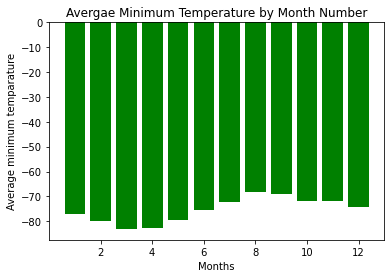

In [85]:
# Plot the results as a bar chart
plt.bar(df_temp_month.index, df_temp_month['min_temp'], color='green')

# Create labels 
plt.xlabel("Months")
plt.ylabel("Average minimum temparature")

# Create the title 
plt.title('Avergae Minimum Temperature by Month Number')

## Which months have the lowest and the highest atmospheric pressure on Mars? 

In [91]:
#Recall the table we obtained average values for each month
df_temp_month 

,id,sol,ls,min_temp,pressure
month,,,,,
1,1013.873563,1077.574713,15.281609,-77.160920,862.488506
2,1109.882022,1175.853933,44.258427,-79.932584,889.455056
3,1132.697917,1204.406250,75.010417,-83.307292,877.322917
4,1175.164948,1244.500000,104.365979,-82.747423,806.329897
5,1115.033557,1182.691275,132.885906,-79.308725,748.557047
6,735.306122,750.829932,164.897959,-75.299320,745.054422
7,714.549296,715.105634,194.894366,-72.281690,795.105634
8,718.078014,795.333333,224.347518,-68.382979,873.829787
9,785.843284,861.186567,254.052239,-69.171642,913.305970


In [92]:
# Lowest atmospheric pressure Month on Mars
low_month_avg = df_temp_month["pressure"].min()
df_temp_month.loc[df_temp_month["pressure"]== low_month_avg]

,id,sol,ls,min_temp,pressure
month,,,,,
6,735.306122,750.829932,164.897959,-75.29932,745.054422


The lowest atmoshpheric pressure on Mars occurs in the month # 6

In [95]:
# Highest atmospheric pressure Month on Mars
high_month_avg = df_temp_month["pressure"].max()
df_temp_month.loc[df_temp_month["pressure"]== high_month_avg]

,id,sol,ls,min_temp,pressure
month,,,,,
9,785.843284,861.186567,254.052239,-69.171642,913.30597


The Highest atmoshpheric pressure on Mars occurs in the month # 9

Text(0.5, 1.0, 'Avergae Minimum Atmospheric Pressure by Month Number')

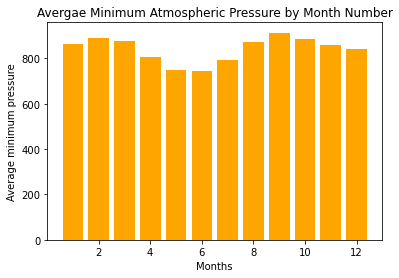

In [96]:
# Plot the results as a bar chart
plt.bar(df_temp_month.index, df_temp_month["pressure"], color='orange')

# Create labels 
plt.xlabel("Months")
plt.ylabel("Average minimum pressure")

# Create the title 
plt.title('Avergae Minimum Atmospheric Pressure by Month Number')

## About how many terrestrial (Earth) days exist in a Martian year? 

Text(0.5, 1.0, 'Daily Minimum Temperature by Martian days')

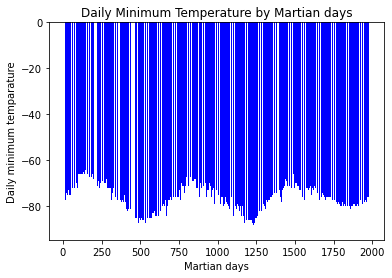

In [98]:
# Plotting daily minimum temparature
plt.bar(temp_df["sol"], temp_df['min_temp'], color='blue')

# Create labels 
plt.xlabel("Martian days")
plt.ylabel("Daily minimum temparature")

# Create the title 
plt.title('Daily Minimum Temperature by Martian days')

In [102]:
### Three cycles can be observed during the 1867 days.
from datetime import date
Number_of_days = date(2018,2,27) - date(2012,8,16)
print("Earth days exist in a Martian Year: ", Number_of_days/3)

Earth days exist in a Martian Year:  673 days, 16:00:00


## Export the DataFrame to a CSV file.

In [104]:
temp_df.to_csv('mars_weather_data.csv', index=False)